In [29]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv(r'C:\Users\acer\Desktop\SEM 6 PPTS\MLL\breast-cancer.csv')

In [31]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
df.shape

(569, 32)

In [33]:
cat_cols = df.select_dtypes(exclude=["int64",'float64']).columns

In [34]:
cat_cols

Index(['diagnosis'], dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()

for i in cat_cols:
    df[i] = lbl_enc.fit_transform(df[i])

In [36]:
X = df.drop(['diagnosis'], axis=1)

y = df["diagnosis"]

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
svm_original = SVC(kernel='linear')
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("Accuracy Orignal: ", accuracy_original)

Accuracy Orignal:  0.956140350877193


In [41]:
from sklearn.decomposition import PCA
for i in range(1,6):
    print("Components: ", i)
    pca = PCA(n_components=i)
    
    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    svm_pca = SVC(kernel='linear')
    svm_pca.fit(X_train_pca, y_train)
    y_pred_pca = svm_pca.predict(X_test_pca)
    
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    print("Accuracy PCA: ", i, "-->", accuracy_pca)

Components:  1
Accuracy PCA:  1 --> 0.9298245614035088
Components:  2
Accuracy PCA:  2 --> 0.9912280701754386
Components:  3
Accuracy PCA:  3 --> 0.9736842105263158
Components:  4
Accuracy PCA:  4 --> 0.9736842105263158
Components:  5
Accuracy PCA:  5 --> 0.9824561403508771


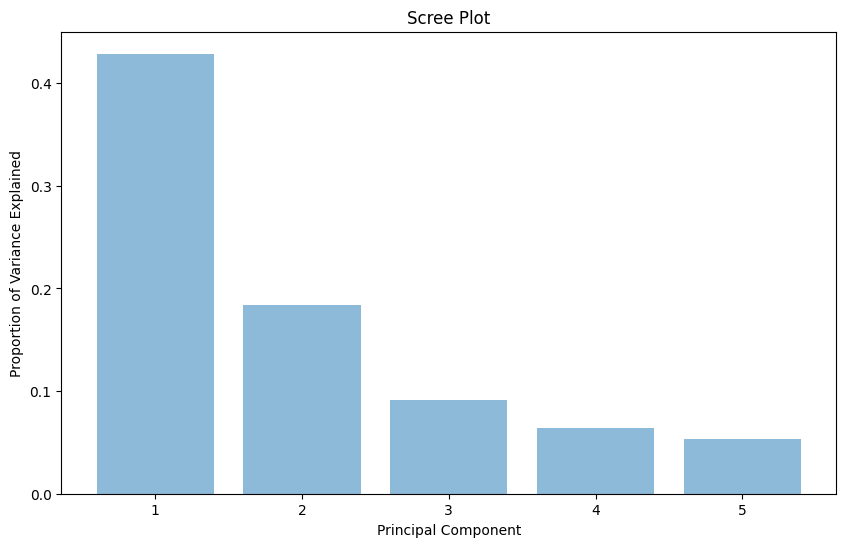

In [43]:
import matplotlib.pyplot as plt
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()